# Manish Sharma
### Data Science and Business Analytic Intern @ The Sparks Foundation

# Task 1 -- Prediction-Using-Supervised-ML

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  

### Reading Dataset

In [2]:
dataset = pd.read_csv('Student_scores.csv')

In [3]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Getting various informations about the dataset

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
dataset.shape

(25, 2)

In [7]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Checking for null values

In [8]:
dataset.isnull().sum()

Hours     0
Scores    0
dtype: int64

### Plotting graph from dataset values

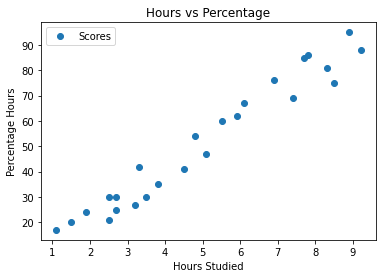

In [9]:
# Plotting the distribution graphs of scores obtained by students
dataset.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Hours')  
plt.show()

### Data Preparation

In [10]:
X = dataset.iloc[:, :-1].values  
y = dataset.iloc[:, 1].values  
X,y

(array([[2.5],
        [5.1],
        [3.2],
        [8.5],
        [3.5],
        [1.5],
        [9.2],
        [5.5],
        [8.3],
        [2.7],
        [7.7],
        [5.9],
        [4.5],
        [3.3],
        [1.1],
        [8.9],
        [2.5],
        [1.9],
        [6.1],
        [7.4],
        [2.7],
        [4.8],
        [3.8],
        [6.9],
        [7.8]]),
 array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
        24, 67, 69, 30, 54, 35, 76, 86], dtype=int64))

In [11]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9) 

### Training Model

In [12]:
from sklearn.linear_model import LinearRegression  
model = LinearRegression()  
model.fit(X_train, y_train) 
print('**Model Trained**')

**Model Trained**


In [13]:
model.coef_

array([9.97185491])

In [14]:
model.intercept_

2.1957915598041424

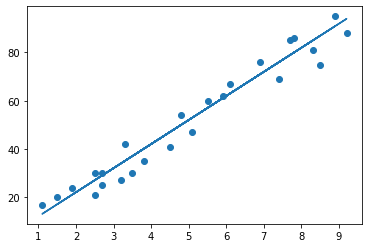

In [15]:
# Plotting of the regression line
line = model.coef_*X+model.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### Predictions

In [16]:
X_test

array([[3.5],
       [2.7],
       [1.5],
       [8.5],
       [5.5]])

In [17]:
print(X_test) # Testing data - In Hours
y_pred = model.predict(X_test) # Predicting the scores

[[3.5]
 [2.7]
 [1.5]
 [8.5]
 [5.5]]


In [18]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,30,37.097284
1,25,29.119800
2,20,17.153574
3,75,86.956558
4,60,57.040994


### Model Evaluation

In [19]:
from sklearn.metrics import mean_absolute_error
score= mean_absolute_error(y_test, y_pred)
print("The Mean Absolute Error is: ",score)

The Mean Absolute Error is:  5.795814875262298


### Prediction if the student studies for 9.25 Hours

In [20]:
hours=np.array([9.25]).reshape(1,-1)
p= model.predict(hours)
print("No of Hours = {}".format(hours))
print("Score of Student = {}".format(p[0]))

No of Hours = [[9.25]]
Score of Student = 94.43544948872531


### If a student studies for 9.25 Hours, he can score 94.43 Percentage